<a href="https://colab.research.google.com/github/BuretGriffin/WEEK-11-GROUP-PROJECT/blob/main/Copy_of_Copy_of_TEAM_BOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Learning with Exploratory Data Analysis for Loan Defaulting Prediction**

**1. Defining the Question**

**a) Specifying the Question**

NBFIs are struggling to make profits due to an increase in defaults in the vehicle loan category. Our aim is to determine the client’s loan repayment abilities and understand the relative importance of each parameter contributing to a borrower’s ability to repay the loan.

The goal of the problem is to predict whether a client will default on the vehicle loan payment or not

**b) Defining the Metric for Success**

A model with more than 70% accuracy in predcting whether a customer will default on their automobile loan

**c) Understanding the context**

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering. NBFIs offer loans to its customers to bridge various financial needs and that include car loans. They compete with various other financial institutions to make this lucrative business opportunity profitable. They can give full car financing or a certain percentage of the total request depending on the various attributes of the customer.

**d) Recording the Experimental Design**

As to how we will tackle the presented challenge, we as a group will allocate tasks among ourselves and work collaboratively on a single Google notepad for version control. All our steps will be documented and the process wil follow an established pattern of Introduction > Analysis > Prediction > Evaluation

# **1. Importing libraries**

In [ ]:
#Our initial Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **2. Reading the Data**

In [ ]:
train = pd.read_csv('Train_Dataset.csv')
#test dataset
test = pd.read_csv('Test_Dataset.csv')

# **3. Checking the Data**

In [ ]:
# Determining the no. of records in our dataset
#
rows, columns = train.shape
print('rows:', rows, 'columns:', columns)

rows: 60619 columns: 40


In [ ]:
rows, columns = test.shape
print('rows:', rows, 'columns:', columns)

rows: 61283 columns: 39


In [ ]:
# Previewing the top of our dataset
#
train.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0.0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0.0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0.0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0.0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0.0


In [ ]:
test.head(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,12202227,11250,0.0,1.0,1.0,1.0,0.0,112500,4474.8,Relative,...,16.0,Yes,Yes,Self-employed,NaN,0.757151,0.629674,0.0515,716.0,2.0
1,12279381,13500,1.0,1.0,1.0,1.0,3.0,49752,3252.15,Alone,...,18.0,No,Yes,Self-employed,NaN,0.342269,NaN,NaN,181.0,NaN
2,12222714,38250,0.0,1.0,0.0,1.0,0.0,67500,3375,Alone,...,19.0,Yes,Yes,Business Entity Type 3,NaN,0.683665,NaN,0.1503,281.0,NaN
3,12265215,20250,0.0,0.0,1.0,0.0,0.0,50849.55,3814.65,Alone,...,20.0,No,No,Medicine,0.351581,0.22995,0.672243,NaN,1442.0,4.0
4,12203970,13500,1.0,1.0,0.0,1.0,0.0,43603.2,2515.95,Alone,...,13.0,Yes,Yes,Self-employed,0.731110,0.566971,0.730987,NaN,927.0,1.0


In [ ]:
# Previewing the bottom of our dataset
# 
train.tail(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
60614,12184552,22500.0,0.0,0.0,0.0,1.0,0.0,45000.0,2441.25,Alone,...,Yes,No,Housing,0.238103,0.706882,0.303146,0.0495,398.0,5.0,1.0
60615,12120429,4950.0,NaN,0.0,1.0,NaN,0.0,9000.0,502.2,NaN,...,Yes,Yes,XNA,NaN,0.482542,NaN,0.0165,2680.0,NaN,0.0
60616,12118321,11250.0,1.0,0.0,0.0,1.0,1.0,6750.0,776.25,Relative,...,Yes,Yes,School,0.326768,0.427474,0.791075,NaN,1756.0,4.0,1.0
60617,12102908,11250.0,1.0,0.0,1.0,1.0,0.0,64008.0,2997,Relative,...,Yes,Yes,Industry: type 3,NaN,0.357282,0.318596,NaN,472.0,1.0,1.0
60618,12163911,13500.0,0.0,1.0,0.0,1.0,0.0,18000.0,900,Alone,...,Yes,Yes,Trade: type 2,0.330763,0.353655,NaN,0.1649,603.0,NaN,NaN


In [ ]:
test.tail(5)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
61278,12235476,11250,0.0,NaN,0.0,1.0,0.0,49049.55,3013.65,Alone,...,14.0,Yes,Yes,XNA,NaN,0.567706,0.300108,0.0928,1276.0,0.0
61279,12252523,33750,0.0,1.0,1.0,1.0,0.0,80865,3146.4,Alone,...,11.0,Yes,Yes,Trade: type 3,NaN,0.037844,0.200926,0.2227,0.0,0.0
61280,12275833,13500,1.0,1.0,0.0,1.0,0.0,75519,3645.9,Alone,...,9.0,Yes,No,Business Entity Type 2,0.665718,0.329582,0.256706,NaN,599.0,4.0
61281,12212182,20250,0.0,1.0,1.0,0.0,0.0,14555.7,761.85,Alone,...,16.0,Yes,Yes,Transport: type 4,NaN,0.66265,NaN,0.1485,1077.0,NaN
61282,12218571,15750,0.0,0.0,1.0,0.0,0.0,96664.5,3846.6,Alone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking whether each column has an appropriate datatype
#
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60619 entries, 0 to 60618
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          60619 non-null  int64  
 1   Client_Income               58817 non-null  object 
 2   Car_Owned                   58854 non-null  float64
 3   Bike_Owned                  58784 non-null  float64
 4   Active_Loan                 58818 non-null  float64
 5   House_Own                   58764 non-null  float64
 6   Child_Count                 58794 non-null  float64
 7   Credit_Amount               58770 non-null  object 
 8   Loan_Annuity                58229 non-null  object 
 9   Accompany_Client            59727 non-null  object 
 10  Client_Income_Type          58771 non-null  object 
 11  Client_Education            58787 non-null  object 
 12  Client_Marital_Status       58870 non-null  object 
 13  Client_Gender               594

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61283 entries, 0 to 61282
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          61283 non-null  int64  
 1   Client_Income               59461 non-null  object 
 2   Car_Owned                   59456 non-null  float64
 3   Bike_Owned                  59374 non-null  float64
 4   Active_Loan                 59430 non-null  float64
 5   House_Own                   59501 non-null  float64
 6   Child_Count                 59506 non-null  float64
 7   Credit_Amount               59532 non-null  object 
 8   Loan_Annuity                58838 non-null  object 
 9   Accompany_Client            60385 non-null  object 
 10  Client_Income_Type          59370 non-null  object 
 11  Client_Education            59487 non-null  object 
 12  Client_Marital_Status       59467 non-null  object 
 13  Client_Gender               600

In [ ]:
#a deeper insight into the data
train.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,6.061900e+04,58854.000000,58784.000000,58818.000000,58764.000000,58794.000000,20843.000000,60619.0,60619.000000,60619.000000,59432.000000,59419.000000,59410.000000,58803.000000,26333.000000,57797.000000,29792.000000,58820.000000,51412.000000,60618.000000
mean,1.216084e+07,0.344276,0.333390,0.497433,0.690253,0.417168,12.146812,1.0,0.198337,0.281710,2.152527,2.030882,3.151927,12.062956,0.501178,0.515882,0.117877,963.506511,1.892904,0.080834
std,3.516812e+04,0.475136,0.471429,0.499998,0.462393,0.727530,12.040181,0.0,0.398751,0.449837,0.910624,0.504621,1.761976,3.278261,0.211951,0.455877,0.109578,827.963181,1.868612,0.272582
min,1.210001e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.017897,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213045e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.0,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.332744,0.390946,0.057700,271.000000,0.000000,0.000000
50%,1.216079e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.0,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.506168,0.565725,0.087600,760.000000,1.000000,0.000000
75%,1.219132e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.0,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.675035,0.663846,0.148500,1574.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,65.000000,1.0,1.000000,1.000000,12.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,19.000000,1.000000


In [ ]:
test.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Social_Circle_Default,Phone_Change,Credit_Bureau
count,6.128300e+04,59456.000000,59374.000000,59430.000000,59501.000000,59506.000000,20768.000000,61282.0,61282.000000,61282.000000,60045.000000,60051.000000,60129.000000,59492.000000,26823.000000,30194.000000,59469.000000,51918.000000
mean,1.224040e+07,0.339024,0.333025,0.497426,0.691820,0.418025,11.966535,1.0,0.199063,0.278483,2.152502,2.030358,3.155865,12.068194,0.501844,0.118209,958.752274,1.897762
std,2.334828e+04,0.473382,0.471299,0.499998,0.461745,0.725154,11.858022,0.0,0.399299,0.448256,0.915020,0.502511,1.754533,3.265563,0.211652,0.109488,826.428728,1.867829
min,1.220000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.015600,0.000000,0.000000,0.000000
25%,1.222020e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.0,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333712,0.057700,270.000000,0.000000
50%,1.224040e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.0,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.507332,0.086600,753.000000,1.000000
75%,1.226060e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.0,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.675182,0.148500,1562.000000,3.000000
max,1.228090e+07,1.000000,1.000000,1.000000,1.000000,19.000000,65.000000,1.0,1.000000,1.000000,20.000000,3.000000,6.000000,23.000000,0.946098,1.000000,4185.000000,25.000000


# **5. Tidying the Dataset**

In [ ]:
# Remove spaces in the column names and convert them to lower case

train.columns = train.columns.str.replace(" ", "_").str.lower()
train.columns

Index(['id', 'client_income', 'car_owned', 'bike_owned', 'active_loan',
       'house_own', 'child_count', 'credit_amount', 'loan_annuity',
       'accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type',
       'client_housing_type', 'population_region_relative', 'age_days',
       'employed_days', 'registration_days', 'id_days', 'own_house_age',
       'mobile_tag', 'homephone_tag', 'workphone_working', 'client_occupation',
       'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour',
       'client_permanent_match_tag', 'client_contact_work_tag',
       'type_organization', 'score_source_1', 'score_source_2',
       'score_source_3', 'social_circle_default', 'phone_change',
       'credit_bureau', 'default'],
      dtype='object')

In [ ]:
## Convert columns to the appropriate data type
# Variable to store column names list
conv_cols = ['client_income','age_days','employed_days', 'registration_days', 'id_days','credit_amount','loan_annuity',
             'population_region_relative','score_source_3']


# Change data type of object columns to numeric 
train[conv_cols] = train[conv_cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Identifying the Missing Data
#
train.isnull().sum()

id                                0
client_income                  1807
car_owned                      1765
bike_owned                     1835
active_loan                    1801
house_own                      1855
child_count                    1825
credit_amount                  1852
loan_annuity                   2398
accompany_client                892
client_income_type             1848
client_education               1832
client_marital_status          1749
client_gender                  1152
loan_contract_type             1808
client_housing_type            1813
population_region_relative     2430
age_days                       1811
employed_days                  1864
registration_days              1805
id_days                        2982
own_house_age                 39776
mobile_tag                        0
homephone_tag                     0
workphone_working                 0
client_occupation             20662
client_family_members          1187
cleint_city_rating          

In [ ]:
## Dealing with the Missing Data
#
# Filling missing values with mean
mean_fill = ['client_income','credit_amount', 'loan_annuity','population_region_relative','age_days', 'employed_days','registration_days',
            'id_days','score_source_2', 'credit_bureau']

for i in mean_fill:
  train[i] = train[i].fillna(train[i].mean())

# Filling missing values with mode
mode_fill = ['car_owned', 'bike_owned', 'active_loan','house_own', 'child_count','accompany_client', 'client_income_type', 'client_education',
       'client_marital_status', 'client_gender', 'loan_contract_type','client_housing_type', 'client_family_members', 'cleint_city_rating',
       'application_process_day', 'application_process_hour','phone_change']
for i in mode_fill:
  train[i] = train[i].fillna(train[i].mode()[0])

# Filling missing values with N/A
train[['client_occupation','type_organization']] = train[['client_occupation','type_organization']].fillna('N/A')

In [ ]:
# Removing columns not needed and with a lot of missing values
train = train.drop(columns=['id','own_house_age','score_source_1','score_source_3','social_circle_default'])

In [ ]:
# Checking for Anomalies
#
cateogry_columns=train.select_dtypes(include=['object']).columns.tolist()
for i in cateogry_columns:
  print('\n')
  print(train[i].unique())



['Alone' 'Relative' 'Others' 'Kids' 'Partner' '##' 'Group']


['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave']


['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']


['M' 'W' 'S' 'D']


['Male' 'Female' 'XNA']


['CL' 'RL']


['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']


['Sales' 'N/A' 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


['Yes' 'No']


['Yes' 'No']


['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' 'N/A'
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Industry: type 9

In [ ]:
# Dealing with anomalies
train.accompany_client = train.accompany_client.replace('##',np.nan)
train.client_gender = train.client_gender.replace('XNA', 'other')

# Dropping the anomalies
train = train.dropna()

In [ ]:
# Checking for duplicated data
train.duplicated().sum()

1173

In [ ]:
# Dealing with duplicated data
train = train.drop_duplicates()

In [ ]:
#converting days to years
train['age'] = (train.age_days/365.25)
train['age'] = train.age.astype(int)
train.age.head()

0    38
1    38
2    45
3    63
4    31
Name: age, dtype: int64

In [ ]:
train.head()

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,...,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.892904,0.0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,...,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.892904,0.0,38
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,...,4.0,10.0,Yes,Yes,Self-employed,0.552795,277.0,0.000000,0.0,45
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,...,2.0,15.0,Yes,Yes,XNA,0.135182,1700.0,3.000000,0.0,63
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,...,3.0,10.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,1.000000,0.0,31


# **6. Exploratory Analysis**

In [ ]:
# Loading the Dataset
# 
df= train.copy()
df.head(5)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,...,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.892904,0.0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,...,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.892904,0.0,38
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,...,4.0,10.0,Yes,Yes,Self-employed,0.552795,277.0,0.000000,0.0,45
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,...,2.0,15.0,Yes,Yes,XNA,0.135182,1700.0,3.000000,0.0,63
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,...,3.0,10.0,Yes,Yes,Business Entity Type 3,0.301182,674.0,1.000000,0.0,31


## **A) Univariate Analysis**

In [ ]:
#Categorical variables
#Frequecy table for gender of the clients who took the automobile loan
df["client_gender"].value_counts()

Male      39420
Female    20016
other         2
Name: client_gender, dtype: int64

Huge percentage of gender that took the automotive loan are male. That means more men took the atomotive loan so that they can puchase the cars.

In [ ]:
#Frequecy table for age of the clients who took the automobile loan
df["age"].value_counts()

43    3382
39    1666
36    1645
37    1643
41    1618
38    1602
40    1599
42    1596
31    1560
27    1553
28    1544
32    1512
29    1485
33    1474
35    1457
44    1442
45    1423
30    1423
34    1378
53    1376
54    1375
46    1340
47    1306
51    1295
49    1289
57    1279
56    1272
59    1266
48    1264
52    1250
50    1218
55    1202
58    1133
60    1065
61    1056
62    1051
63    1001
64     967
26     884
24     804
23     742
25     742
65     555
22     507
67     431
66     403
21     227
68     136
Name: age, dtype: int64

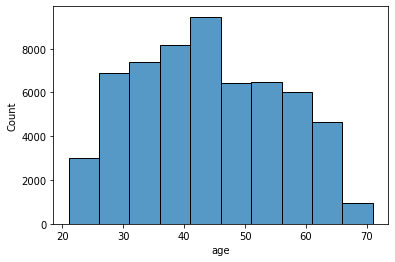

In [ ]:
#Plot showing the distribution of age of the clients
sns.histplot(df['age'], binwidth=5);

The age of the clients, most of them belong in the age group of 40 - 45

In [ ]:
#Frequecy table for occupation of the clients who took the automobile loan
df["client_occupation"].value_counts()

N/A                   20259
Laborers              10214
Sales                  5901
Core                   5193
Managers               3992
Drivers                3509
High skill tech        2086
Accountants            1852
Medicine               1568
Security               1307
Cooking                1047
Cleaning                821
Private service         466
Low-skill Laborers      391
Waiters/barmen          253
Secretaries             247
Realty agents           139
HR                       99
IT                       94
Name: client_occupation, dtype: int64

 We can see that the largest nember of the clients who took the automotive loan are labourers.These are people doing unskilled manual work for wages.

Text(0.5, 1.0, 'countplot showing default rates')

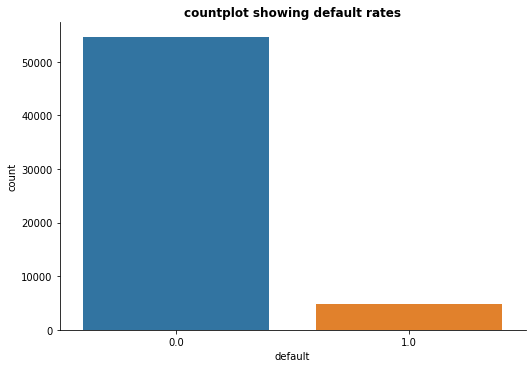

In [ ]:
# countplot showing default rates 
#whether someone defaulted or not (1 means the client defaulted on loan payments and 0 means otherwise)
palette = ['blue','pink']
sns.catplot(x='default',data=df,kind='count',aspect=1.5)
sns.set_palette(palette)
plt.title('countplot showing default rates',weight='bold')

Majority of the people who took the automotive loan did not default

In [ ]:
#Frequecy table for the level of education of the clients who took the automobile loan
df["client_education"].value_counts()

Secondary             42598
Graduation            14215
Graduation dropout     1911
Junior secondary        686
Post Grad                28
Name: client_education, dtype: int64

This shows the Highest level of education achieved by client. Majority of the clients who took the loan are those whose highest level of education is secondary.

In [ ]:
#Frequecy table for income type of the clients who took the automobile loan
df["client_income_type"].value_counts()

Service            31542
Commercial         13474
Retired            10271
Govt Job            4141
Student                7
Unemployed             2
Maternity leave        1
Name: client_income_type, dtype: int64

Most of the clients who took the loan are in service.

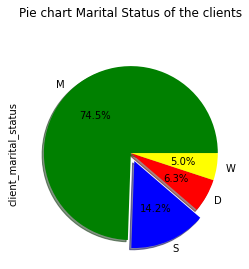

In [ ]:
#pie chart for marital status
#This shows Marital status of client (D- Divorced, S- Single, M- Married, W- Widowed)
df["client_marital_status"].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1,0,0), colors=['green',"blue","red","yellow"], autopct='%1.1f%%')
plt.title("Pie chart Marital Status of the clients", y=1.1)
plt.show()

73% of the clients who took the loan are maried while 5.1% which is the least number of clients are widowed

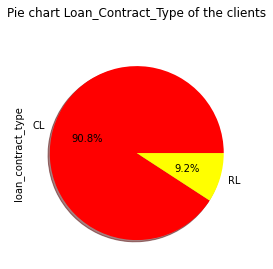

In [ ]:
#pie chart for Loan_Contract_Type
#This shows Loan Type (CL- Cash Loan, RL- Revolving Loan)
df["loan_contract_type"].value_counts().plot(kind='pie',shadow = True,explode=(0,0), colors=["red","yellow"], autopct='%1.1f%%')
plt.title("Pie chart Loan_Contract_Type of the clients", y=1.1)
plt.show()

Majority of the clients took a cash loan for a loan contrac

Text(0.5, 1.0, 'Number of house wowned by the client')

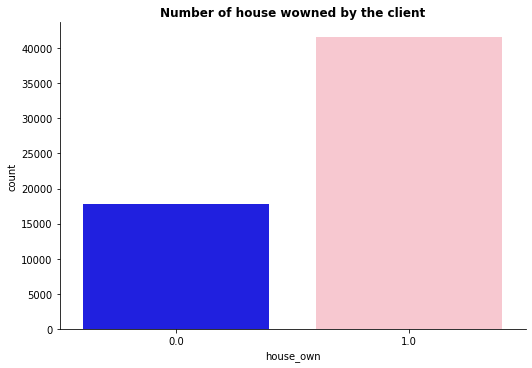

In [ ]:
#Catplot to show Any house owned by client (0 means No and 1 means otherwise)
sns.catplot(x='house_own',data=df,kind='count',aspect=1.5)
plt.title('Number of house wowned by the client',weight='bold')

From the analysis, the largest percentage of the clients who applied for the automotive loans have home ownership



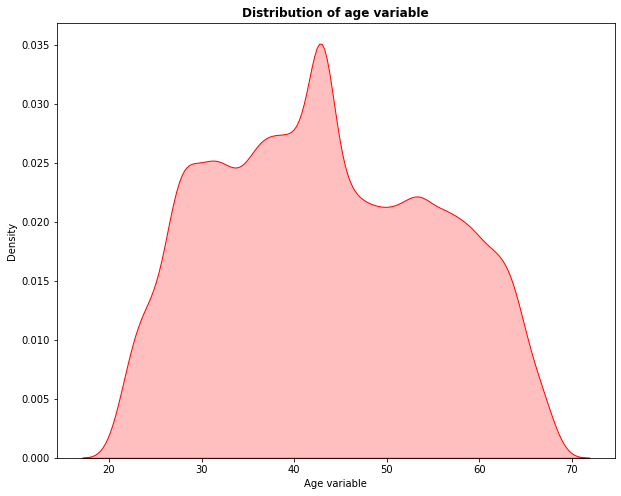

In [ ]:
#plot showing distributions of ages (Age of the client at the time of application submission)
f, ax = plt.subplots(figsize=(10,8))
x = df["age"]
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable",weight='bold')
plt.show()

From the subplot, we can see that most the people who appried for the automotive loan were from the age group of 40-45 years

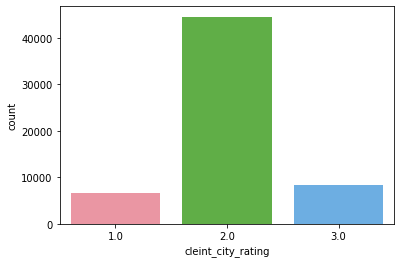

In [ ]:
#plot to show distribution of clients in different cities
#Client city rating. 3 denotes best and 2 denotes good and 1 denotes average
sns.countplot(df['cleint_city_rating'])

Most of the loan accounts are to clients from level 2 cities(Client city rating. 3 denotes best and 2 denotes good and 1 denotes average)

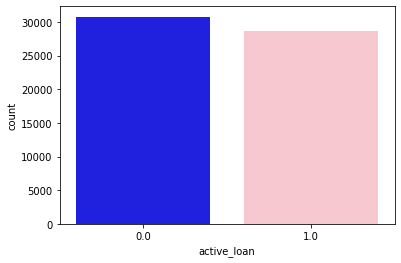

In [ ]:
#Plot to show if a client has an existing loan or not
#Any other active loan at the time of aplication of loan (0 means No and 1 means otherwise)
sns.countplot(df['active_loan'])

This denotes any other active loan at the time of aplication of loan (0 means No and 1 means otherwise). That means most of the loan applicants did not have an existing loan.

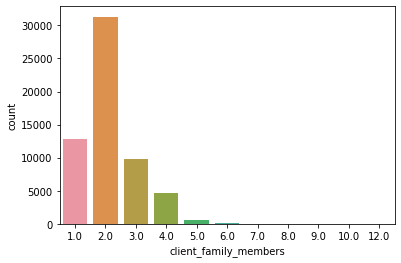

In [ ]:
#plot to show the Number of family members  does client have
#Number of family members does client have

sns.countplot(df['client_family_members'])

Most of the clients who applied for the automotive loan had 2 to 3 family members

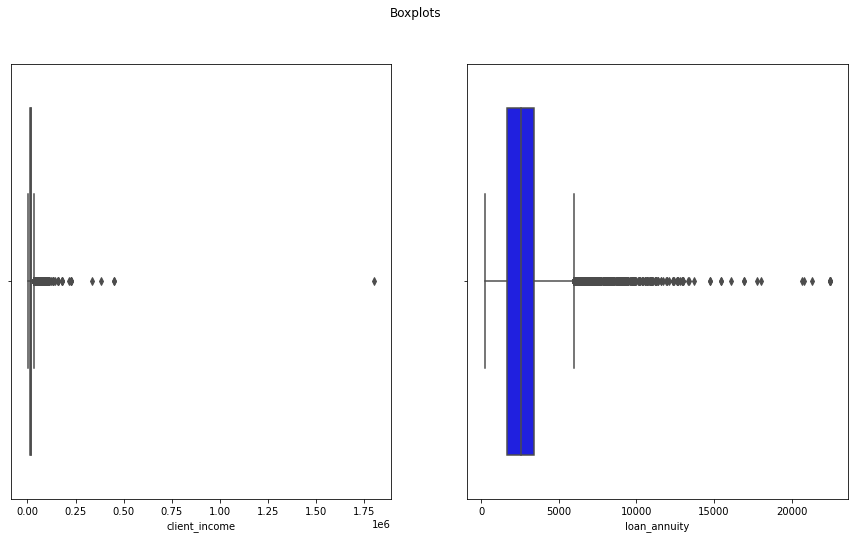

In [ ]:
#Box plot
# Checking for outliers in the client income and loan annuity
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['client_income'], ax=axes[0])
sns.boxplot(df['loan_annuity'], ax=axes[1])
plt.show()

Income is a major detaminant of whether a client will be granted a loan or not.From our dataset, we are dealing with people from diverse fields with different salary range. We shall not drop the outliers since its is possible to get a client with an income more than 1 million

For loan annuity, different clients took different amounts of loan. Annuity due payment will be different

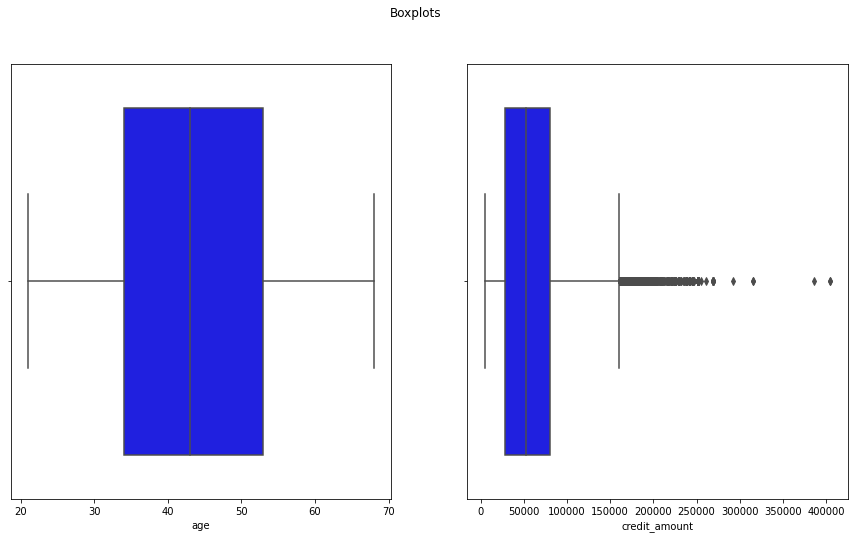

In [ ]:
# Checking for outliers in the age and credit amount
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=axes[0])
sns.boxplot(df['credit_amount'], ax=axes[1])
plt.show()

The credit amount is different based on the different amount of loan taken by the client

## **B) Bivariate Analysis**

Text(0.5, 1.0, 'Default rate distribution with gender')

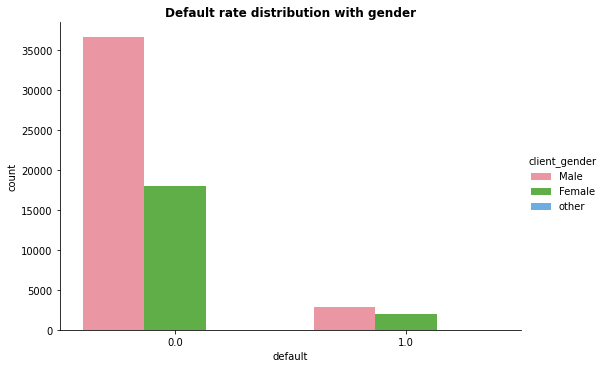

In [ ]:
#To determine if the gender of the applicant affects the default rate
#(1 means the client defaulted on loan payments and 0 means otherwise)
sns.catplot(x='default',hue='client_gender',data=df,kind='count',aspect=1.5)
plt.title('Default rate distribution with gender',weight='bold')

From the graph we can see that most of the people who applied for the loan are male, female applicants were few. Male applicants had the highest default rate while female applicants had a lower default rate compared to male applicants

Text(0.5, 1.0, 'Default rate distribution with client occupation')

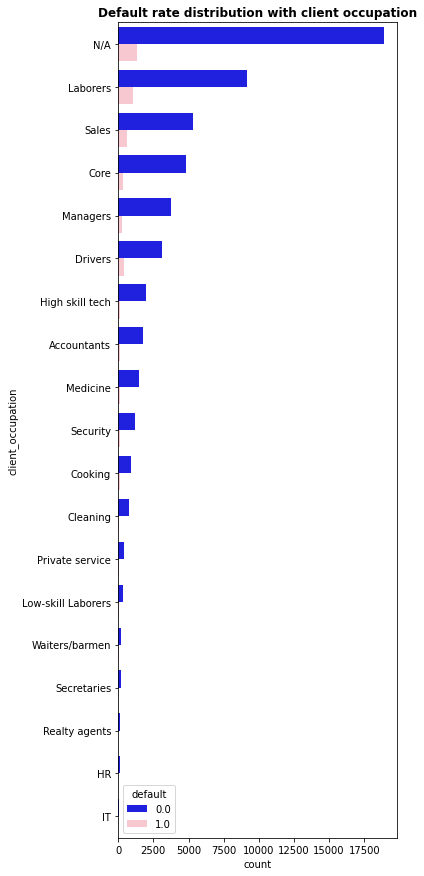

In [ ]:
#To find out how the occupation of the applicant affects the default rate
#(1 means the client defaulted on loan payments and 0 means otherwise)
plt.figure(figsize=(5, 15))
sns.countplot(y = df["client_occupation"], order= df.client_occupation.value_counts().index, hue = df["default"])
plt.title('Default rate distribution with client occupation',weight='bold')

Majority of the people who defaulted the loan did not indicate their occupation followed by labourers

Text(0.5, 1.0, 'Default rate distribution with age')

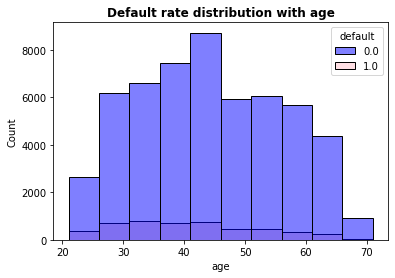

In [ ]:
#To determine if the age of the applicant affects the default rate
sns.histplot(data=df, x='age', hue='default',binwidth=5)
plt.title('Default rate distribution with age',weight='bold')

Most of the defaulters were are between the ages of 30 and 35

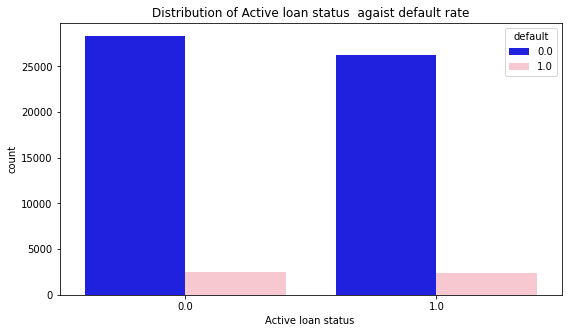

In [ ]:
#To determine if having different loans affects the default rate
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='active_loan',hue='default')
plt.xlabel('Active loan status ')
plt.ylabel('count')
plt.title('Distribution of Active loan status  agaist default rate') 
plt.show()

Clients who have a different loan are more likely to default compared to those who do no

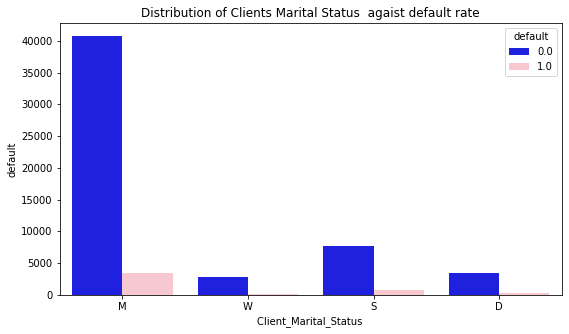

In [ ]:
#To determine if the marital status of the applicant affects the default rate
#Stacked column chart for Client_Marital_Status  agaist default rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["client_marital_status"], hue = df["default"])
plt.xlabel('Client_Marital_Status ')
plt.ylabel('default')
plt.title('Distribution of Clients Marital Status  agaist default rate') 
plt.show()

Clients who are married are more likely to take and to default on the loan

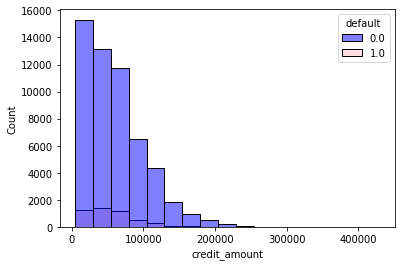

In [ ]:
#To determine if the amount borrowed affects the applicant's ability to repay
sns.histplot(x= df['credit_amount'], hue = df['default'],binwidth=25000)

Clients who borrow between 25000 and 50000 are the most likely to default

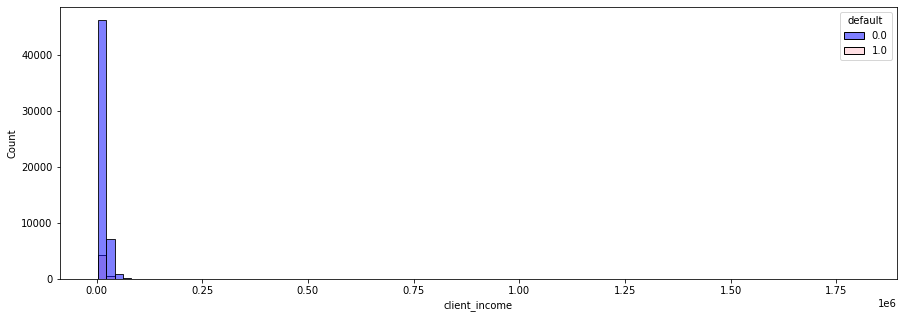

In [ ]:
#To determine if the income of the applicant affects the default rate
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='client_income', hue='default',binwidth=20000)

Clients with lower income (betrween 0 and 20000) are most likely to default

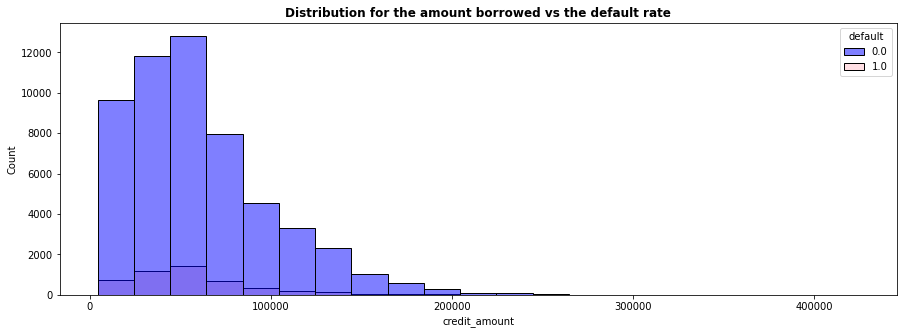

In [ ]:
#To determine if the amount borrowed affects the applicant's ability to repay
# Line graph for the amount borrowed vs the default rate
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='credit_amount', hue='default',binwidth=20000)
plt.title("Distribution for the amount borrowed vs the default rate", fontweight='bold')
plt.show()

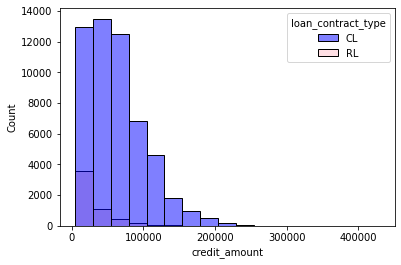

In [ ]:
#To determine the relationship between the contract type of the loan and  the loan amount 
sns.histplot( x = df['credit_amount'],hue = df['loan_contract_type'],binwidth=25000)

Rolling contracts are more likely between 0 to 25000

Cash loans are more likely between 25000 to 50000

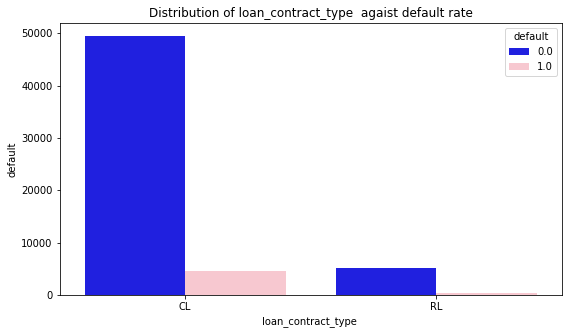

In [ ]:
#To determine if the loan_contract_type of the applicant affects the default rate
#Stacked column chart for loan_contract_type  agaist default rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["loan_contract_type"], hue = df["default"])
plt.xlabel('loan_contract_type ')
plt.ylabel('default')
plt.title('Distribution of loan_contract_type  agaist default rate') 
plt.show()

In [ ]:
#correlation
df.corr()

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,population_region_relative,age_days,...,workphone_working,client_family_members,cleint_city_rating,application_process_day,application_process_hour,score_source_2,phone_change,credit_bureau,default,age
client_income,1.000000,0.153050,-0.006272,0.004427,0.004820,0.025212,0.293063,0.359123,-0.000367,-0.048979,...,-0.003807,0.028790,-0.172029,0.001515,0.071451,0.050795,0.033532,0.021817,-0.020530,-0.048949
car_owned,0.153050,1.000000,-0.000820,-0.001128,-0.009502,0.099390,0.108980,0.134306,-0.003209,-0.128647,...,-0.009908,0.146732,-0.022646,-0.002353,0.013553,0.027060,0.033000,-0.040366,-0.024320,-0.128419
bike_owned,-0.006272,-0.000820,1.000000,-0.000570,0.002497,0.000032,0.000789,-0.006316,0.008342,0.005650,...,-0.008683,0.001408,0.003553,-0.003889,-0.000128,0.004654,-0.000811,-0.002318,-0.001057,0.005659
active_loan,0.004427,-0.001128,-0.000570,1.000000,-0.006854,0.003915,0.001821,-0.000670,0.005997,0.004534,...,-0.001677,0.002257,0.000458,0.000209,0.001449,-0.004740,0.007470,0.009183,0.005592,0.004345
house_own,0.004820,-0.009502,0.002497,-0.006854,1.000000,-0.004541,-0.039185,-0.005191,0.004114,0.115145,...,-0.038784,0.006072,0.001988,0.011932,-0.101274,0.002633,-0.021647,0.062929,0.003841,0.114988
child_count,0.025212,0.099390,0.000032,0.003915,-0.004541,1.000000,0.001543,0.022463,-0.003876,-0.316940,...,-0.028522,0.848084,0.022415,-0.000569,-0.010073,-0.009528,0.011978,-0.037652,0.020880,-0.316843
credit_amount,0.293063,0.108980,0.000789,0.001821,-0.039185,0.001543,1.000000,0.741648,-0.002655,0.050666,...,0.030739,0.059294,-0.111237,-0.005958,0.047207,0.049656,0.065317,-0.045055,-0.030076,0.050677
loan_annuity,0.359123,0.134306,-0.006316,-0.000670,-0.005191,0.022463,0.741648,1.000000,-0.001778,-0.009861,...,0.012172,0.072609,-0.138245,0.003037,0.049790,0.048818,0.053999,-0.013861,-0.012467,-0.009909
population_region_relative,-0.000367,-0.003209,0.008342,0.005997,0.004114,-0.003876,-0.002655,-0.001778,1.000000,0.000166,...,0.004962,-0.001561,-0.012472,0.001113,0.007401,0.002102,-0.000324,-0.003057,-0.002453,0.000110
age_days,-0.048979,-0.128647,0.005650,0.004534,0.115145,-0.316940,0.050666,-0.009861,0.000166,1.000000,...,0.039287,-0.271835,-0.006540,0.009954,-0.083914,0.034209,0.077089,0.065878,-0.074116,0.999692


## **C) Multi-variate Analysis**

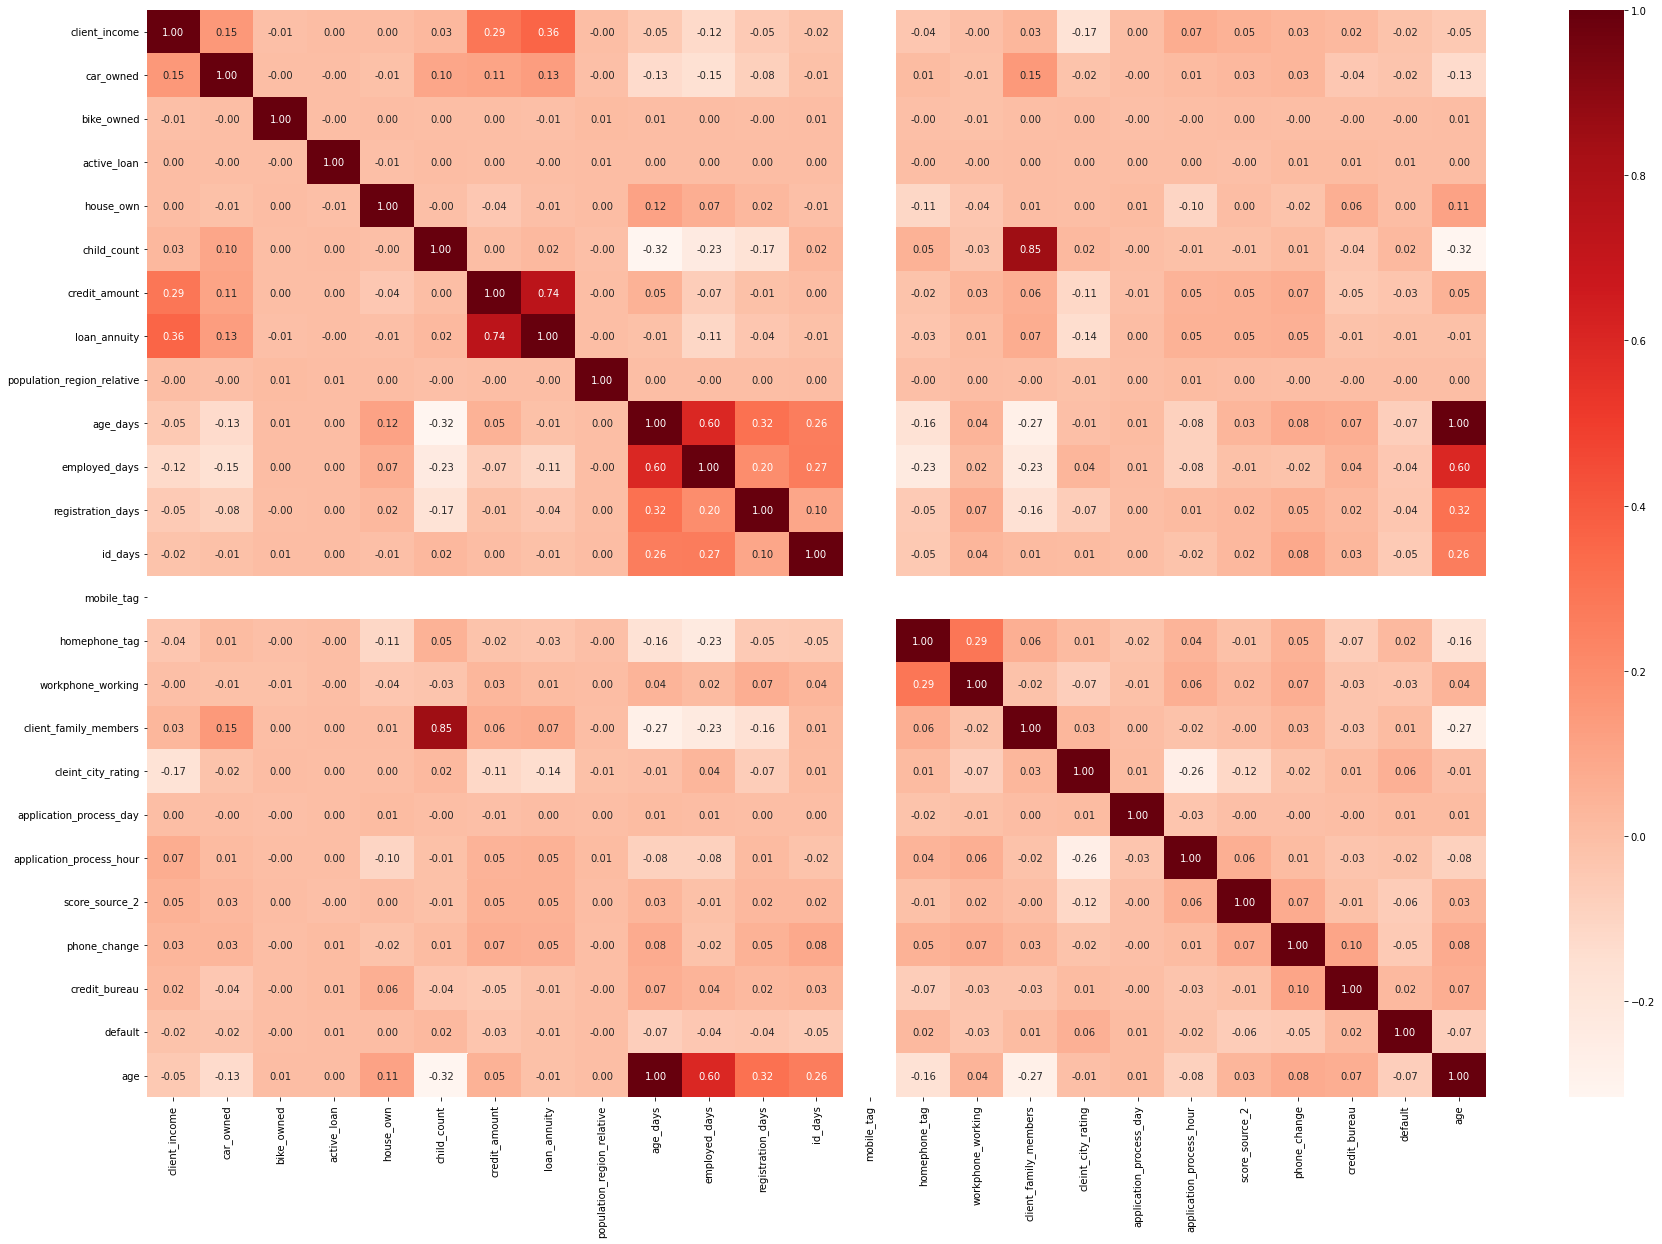

In [ ]:
#Plotting a heat map to show correlation between the variables
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

The following are the standout correlations;

Coefficient of one accross the diagonal shows that a variable perfectly correlates to itself

There is a strong positive correlation(0.85) between child count and client family members

There is a string positive correlation (0.6) between age in days and employed days

There is a weak positive correlation (0.39) between client income and loan annuity

There is a weak positive correlation (0.32) between client income and credit amount

The other features have zero and weak correlations between each other

In [ ]:
df.head(2)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,...,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,6.0,17.0,Yes,Yes,Self-employed,0.478787,63.0,1.892904,0.0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,Alone,Service,...,3.0,10.0,Yes,Yes,Government,0.215068,0.0,1.892904,0.0,38


**FEATURE ENGINEERING**

In [ ]:
# FEATURE ENGINEERING
# 
#installing category encoder
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 6.5 MB/s 


In [ ]:
# import category encoders
import category_encoders as ce

#These are the categorical columns that will be converted to numberical
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
for i in cateogry_columns:
  print('\n')
  print(train[i].unique())



['Alone' 'Relative' 'Others' 'Kids' 'Partner' 'Group']


['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave']


['Secondary' 'Graduation' 'Graduation dropout' 'Junior secondary'
 'Post Grad']


['M' 'W' 'S' 'D']


['Male' 'Female' 'other']


['CL' 'RL']


['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']


['Sales' 'N/A' 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


['Yes' 'No']


['Yes' 'No']


['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' 'N/A'
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Industry: type 9' '

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)
df = encoder.fit_transform(df)
df.head(2)

,client_income,car_owned,bike_owned,active_loan,house_own,child_count,credit_amount,loan_annuity,accompany_client,client_income_type,...,application_process_day,application_process_hour,client_permanent_match_tag,client_contact_work_tag,type_organization,score_source_2,phone_change,credit_bureau,default,age
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,1,1,...,6.0,17.0,1,1,1,0.478787,63.0,1.892904,0.0,38
1,20250.0,1.0,0.0,1.0,1.0,0.0,15282.00,1826.55,1,2,...,3.0,10.0,1,1,2,0.215068,0.0,1.892904,0.0,38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59438 entries, 0 to 60617
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   client_income               59438 non-null  float64
 1   car_owned                   59438 non-null  float64
 2   bike_owned                  59438 non-null  float64
 3   active_loan                 59438 non-null  float64
 4   house_own                   59438 non-null  float64
 5   child_count                 59438 non-null  float64
 6   credit_amount               59438 non-null  float64
 7   loan_annuity                59438 non-null  float64
 8   accompany_client            59438 non-null  int64  
 9   client_income_type          59438 non-null  int64  
 10  client_education            59438 non-null  int64  
 11  client_marital_status       59438 non-null  int64  
 12  client_gender               59438 non-null  int64  
 13  loan_contract_type          594

# **7. Naive Bayes**

In [ ]:
# Loading the libraries 
#
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

**MultinomialNB**

In [ ]:
# split the data into labels and features

X = df.drop(columns=['default']).values
y = df['default'].values

# splitting into train an test sets

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=df['default'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Modelling for training and predictions

clf = MultinomialNB()  
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.25420592193808883
[[2221 8736]
 [ 130  801]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.94      0.20      0.33     10957
         1.0       0.08      0.86      0.15       931

    accuracy                           0.25     11888
   macro avg       0.51      0.53      0.24     11888
weighted avg       0.88      0.25      0.32     11888



Accuracy Score is **25.36%**

The precision of class 0 is **95%** and precision class 1 is **0.09%** which is too low caused by the class imbalance.

**Gaussian**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# split the data into labels and features

X = df.drop(columns=['default']).values
y = df['default'].values

# splitting into train an test sets

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=df['default'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Modelling for training and predictions

clf = GaussianNB()  
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred1 = clf.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred1))

The accuracy of the model is  0.9213492597577388
[[10951     6]
 [  929     2]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10957
         1.0       0.25      0.00      0.00       931

    accuracy                           0.92     11888
   macro avg       0.59      0.50      0.48     11888
weighted avg       0.87      0.92      0.88     11888



Accuracy Score is **91.97%**

The precision of class 0 is **92%** and precision class 1 is **0.00%** which is too low caused by the class imbalance.

**Bernoulli**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# split the data into labels and features

X = df.drop(columns=['default'])
y = df['default']

# splitting into train an test sets

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=df['default'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Modelling for training and predictions

clf = BernoulliNB()
clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred2 = clf.predict(X_test)

In [ ]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred2))

The accuracy of the model is  0.921685733512786
[[10957     0]
 [  931     0]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10957
         1.0       0.00      0.00      0.00       931

    accuracy                           0.92     11888
   macro avg       0.46      0.50      0.48     11888
weighted avg       0.85      0.92      0.88     11888



Accuracy Score is **91.97%**

The recall of class 0 is **100%** and recall class 1 is **0.00%** which is too low caused by the class imbalance.

**Oversample minority class**

In [ ]:
train_data = pd.concat([X_train,y_train],axis=1)

default_zero = train_data[train_data.default==0]
default_one = train_data[train_data.default==1]

In [ ]:
#For Sampling
from sklearn.utils import resample

upsampled_One = resample(default_one,
                          replace=True, # sample with replacement
                          n_samples=len(default_zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([default_zero, upsampled_One])

In [ ]:
y_train.value_counts()

0.0    43664
1.0     3886
Name: default, dtype: int64

In [ ]:
upsampled['default'].value_counts()


0.0    43664
1.0    43664
Name: default, dtype: int64

In [ ]:
# split the data into labels and features

X = upsampled.drop(columns=['default']).values
y = upsampled['default'].values

# splitting into train an test sets

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=upsampled['default'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Modelling for training and predictions

# clf = MultinomialNB()  
clf = GaussianNB()  
# clf = BernoulliNB()

clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred5 = clf.predict(X_test)
prediction_train = clf.predict(X_train)

In [ ]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the test model is ',metrics.accuracy_score(y_test, y_pred5))
print('The accuracy of the train model is ',metrics.accuracy_score(y_train, prediction_train))
print(confusion_matrix(y_test, y_pred5))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred5))

The accuracy of the test model is  0.568075117370892
The accuracy of the train model is  0.5643840714551545
[[3429 5215]
 [2329 6493]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.40      0.48      8644
         1.0       0.55      0.74      0.63      8822

    accuracy                           0.57     17466
   macro avg       0.58      0.57      0.55     17466
weighted avg       0.57      0.57      0.56     17466



After dealing with the class imbalance, the model worked better on class 1 but less accurate on class 0

Accuracy Score is **57.06%**

The recall of class 0 is **44%** and recall class 1 is **70%** 

**Undersample majority class**

In [ ]:
df['default'].value_counts()

0.0    54621
1.0     4817
Name: default, dtype: int64

In [ ]:
downsampled_Zero = resample(default_zero,
                                replace = False, # sample without replacement
                                n_samples = len(default_one), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, default_one])

In [ ]:
downsampled['default'].value_counts()

0.0    3886
1.0    3886
Name: default, dtype: int64

In [ ]:
# split the data into labels and features

X = downsampled.drop(columns=['default']).values
y = downsampled['default'].values

# splitting into train an test sets

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0, stratify=downsampled['default'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Modelling for training and predictions

# clf = MultinomialNB()  
clf = GaussianNB()  
# clf = BernoulliNB()

clf = clf.fit(X_train, y_train) 

# predicting using the model built

y_pred5 = clf.predict(X_test)
prediction_train = clf.predict(X_train)

In [ ]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the test model is ',metrics.accuracy_score(y_test, y_pred5))
print('The accuracy of the train model is ',metrics.accuracy_score(y_train, prediction_train))
print(confusion_matrix(y_test, y_pred5))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred5))

The accuracy of the test model is  0.5633440514469453
The accuracy of the train model is  0.5819527103104392
[[351 425]
 [254 525]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51       776
         1.0       0.55      0.67      0.61       779

    accuracy                           0.56      1555
   macro avg       0.57      0.56      0.56      1555
weighted avg       0.57      0.56      0.56      1555



Training with the undersample to deal with class imbalance produced almost similar results with the oversampling

Accuracy Score is **57.95%**

The recall of class 0 is **43%** and recall class 1 is **73%**

**Hyperparameter Tuning**

In [ ]:
# split the data into labels and features

X = downsampled.drop(columns=['default']).values
y = downsampled['default'].values

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyper parameters for the Naive Bayes
param_grid_nb = { 'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)

print(grid.best_params_)

# #Creating a better model based on the parameters given to us by the greadsearch
# # predicting using the model built

y_pred = grid.predict(X_test)

# Evaluating the Algorithm
# ---
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=2.310129700083158e-09)
{'var_smoothing': 2.310129700083158e-09}
The accuracy of the model is  0.574139594724992

 Confusion matrix
[[ 729  836]
 [ 488 1056]]

 Classification report
              precision    recall  f1-score   support

         0.0       0.60      0.47      0.52      1565
         1.0       0.56      0.68      0.61      1544

    accuracy                           0.57      3109
   macro avg       0.58      0.57      0.57      3109
weighted avg       0.58      0.57      0.57      3109



****

With hyperparameter tuning, the accuracy produced almost similar results with the oversampling and undersampling

Accuracy Score is **57.89%**

The recall of class 0 is **44%** and recall class 1 is **72%**

# **8. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Create a decision tree classifier

tree = DecisionTreeClassifier()
X = df.drop('default', axis = 1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8526127963293398


In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[16435  1586]
 [ 1305   289]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     18021
         1.0       0.15      0.18      0.17      1594

    accuracy                           0.85     19615
   macro avg       0.54      0.55      0.54     19615
weighted avg       0.86      0.85      0.86     19615



The F1 score is a measure of the models precision and recall, it is important as accuracy is not always the most reliable measure for classification problem. As we can see from the cell above, the model is better at making accurate predictions of not defaulting and better recal of the same. In this case its best to get a model that perfoms these two the best

# **9. Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Fitting RF classifier to the Training set
rand_forest = RandomForestClassifier()

# Train it on our training set.
rand_forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = rand_forest.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9211317868977823


The accuracy of random forest is about 92%

In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[18021     0]
 [ 1547    47]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18021
         1.0       1.00      0.03      0.06      1594

    accuracy                           0.92     19615
   macro avg       0.96      0.51      0.51     19615
weighted avg       0.93      0.92      0.89     19615



The f1 score in this model has a better value for not defaulting in comparison with the previous one, however its score for defaulting is lower than the previous

# **10. ADA boost and Gradient boost**

In [ ]:
# Importing the libraries
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Fitting AdaBoost classifier to the Training set
AdB_classifier = AdaBoostClassifier(random_state=0)
AdB_classifier.fit(X_train, y_train)

# Fitting Gradient Boosting classifier to the Training set
GBM_classifier = GradientBoostingClassifier(random_state=0, learning_rate=0.1)
GBM_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
# Getting the predicted values
y_pred_AdB = AdB_classifier.predict(X_test)
y_pred_GBM = GBM_classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy Ada Boost:",metrics.accuracy_score(y_test, y_pred_AdB))
print("Accuracy Gradient Boost:",metrics.accuracy_score(y_test, y_pred_GBM))

Accuracy RF: 0.9211317868977823
Accuracy Ada Boost: 0.9180219219984705
Accuracy Gradient Boost: 0.9185317359163905


Random forest has the highest accuracy with ada boost having the lowest accuracy

In [ ]:
# Model confusion matrix , how often is the classifier correct?
print("Confusion matrix RF:"'\n',metrics.confusion_matrix(y_test, y_pred))
print("Confusion matrix Ada Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_AdB))
print("Confusion matrix Gradient Boost:"'\n',metrics.confusion_matrix(y_test, y_pred_GBM))

Confusion matrix RF:
 [[18021     0]
 [ 1547    47]]
Confusion matrix Ada Boost:
 [[17996    25]
 [ 1583    11]]
Confusion matrix Gradient Boost:
 [[18005    16]
 [ 1582    12]]


In [ ]:
# Model classification_report matrix , how often is the classifier correct?
print("classification_report RF:"'\n',metrics.classification_report(y_test, y_pred))
print("classification_report Ada Boost:"'\n',metrics.classification_report(y_test, y_pred_AdB))
print("classification_report Gradient Boost:"'\n',metrics.classification_report(y_test, y_pred_GBM))

classification_report RF:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18021
         1.0       1.00      0.03      0.06      1594

    accuracy                           0.92     19615
   macro avg       0.96      0.51      0.51     19615
weighted avg       0.93      0.92      0.89     19615

classification_report Ada Boost:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18021
         1.0       0.31      0.01      0.01      1594

    accuracy                           0.92     19615
   macro avg       0.61      0.50      0.49     19615
weighted avg       0.87      0.92      0.88     19615

classification_report Gradient Boost:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18021
         1.0       0.43      0.01      0.01      1594

    accuracy                           0.92     19615
   macro avg       0.67     

The accuracy is very high but it is due to the class imbalance as the default class is about 8% thus class rebalancing will be important to improve the f1 scores which are very low

**Resampling using oversampler**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.3)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

# Split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

Chose oversampling to prevent information loss from the larger non default class

# **11. K - Nearest Neighbours**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [ ]:
# Implementing the Solution
# define our x and y
# 
X = df.drop(columns=['default']).values
y = df['default'].values

In [ ]:
# splitting data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# scaling our features
# 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# training our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# make predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame

,actual,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
11883,0.0,0.0
11884,0.0,0.0
11885,0.0,0.0
11886,0.0,0.0


In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9214333781965006


In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[10950     7]
 [  927     4]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10957
         1.0       0.36      0.00      0.01       931

    accuracy                           0.92     11888
   macro avg       0.64      0.50      0.48     11888
weighted avg       0.88      0.92      0.88     11888



**Using SMOTE to counter Class Imbalance**

In [ ]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter


0.8.1


In [ ]:
# splitting data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 43664, 1.0: 3886})


In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)
# training our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
# make predictions with our trained model
# 
y_pred = classifier.predict(X_test)

comparison_frame = pd.DataFrame({'actual':y_test.flatten(), 'predicted':y_pred.flatten()})
comparison_frame


Counter({0.0: 43664, 1.0: 43664})


,actual,predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
11883,0.0,0.0
11884,0.0,0.0
11885,0.0,1.0
11886,0.0,1.0


In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6451043068640646


In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[7278 3679]
 [ 540  391]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.66      0.78     10957
         1.0       0.10      0.42      0.16       931

    accuracy                           0.65     11888
   macro avg       0.51      0.54      0.47     11888
weighted avg       0.87      0.65      0.73     11888



**Random Under Sampling**


In [ ]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings

In [ ]:
# Implementing the Solution
# define our x and y
# 
X = df.drop(columns=['default']).values
y = df['default'].values

In [ ]:
# splitting data into train and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
# summarize class distribution
print("Before undersampling: ", Counter(y_train))

Before undersampling:  Counter({0.0: 43664, 1.0: 3886})


In [ ]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [ ]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

In [ ]:
# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0.0: 3886, 1.0: 3886})


In [ ]:
# training our model KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)
# make predictions with our trained model
# 
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9213492597577388


In [ ]:
# Getting the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[10953     4]
 [  931     0]]


In [ ]:
# Getting the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     10957
         1.0       0.00      0.00      0.00       931

    accuracy                           0.92     11888
   macro avg       0.46      0.50      0.48     11888
weighted avg       0.85      0.92      0.88     11888



# **CONCLUSIONS**

**RECOMMENDATION**

Target customers with rolling loans because they have a lower default rate
Target customers with income above $20,000 because they have a lower default rate 

• Target customers who borrow amount greater than $ 50,000 because they have a lower default rate

Avoid lending loans to clients who do not indicate their occupation because they have a higher default rate

Target customers who do not have an active loan

Perform background checks for clients of ages between 25 and 45 because they have a higher default rate

Check on external validation using score source variable column as it is the most

important determinant of the default rate.

Perform background checks for clients who are married because they have a higher default rate